## 1.1 Contents<a id='1.1_Contents'></a>
* [1 Data wrangling](#1_Data_wrangling)
  * [1.1 Contents](#1.1_Contents)
  * [1.2 Introduction](#1.2_Introduction)
  * [1.3 Imports](#1.3_Imports)
  * [1.4 Load The Data](#1.4_Load_The_Data)
  * [1.5 Explore The Data](#1.5_Explore_The_Data)
    * [1.5.1 Number Of Missing Values By Column](#1.5.1_Number_Of_Missing_Values_By_Column)
  * [1.6 Correcting Feature Types](#1.6_Correcting_Feature_Types)
  * [1.7 Removing Data](#1.7_Removing_Data)
    * [1.7.1 Irrelevant Features](#1.7.1_Irrelevant_Features)
    * [1.7.2 Removing Null Values](#1.7.2_Removing_Null_Values)
    * [1.7.3 Imputing Null Values](#1.7.3_Imputing_Null_Values)
  * [1.8 Saving The Data](#1.8_Saving_The_Data)

## 1.2 Introduction<a id='1.2_Introduction'></a>

The first step will be collecting data, organizing it, and making sure it's well defined. The aim of the project is to create a model that will predict the likelihood of default. The data will need to be consistent and cleaned for the model to make accurate predictions.

## 1.3 Imports<a id='1.3_Imports'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
sns.set()
pd.set_option('display.max_columns',50)

First we import the appropriate libraries.

## 1.4 Load The Data<a id='1.4_Load_The_Data'></a>

In [2]:
loan_default_data = pd.read_csv('../data/raw/loan_default_data.csv',index_col=0)

Here we are loading the raw data into a pandas DataFrame.

In [3]:
loan_default_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38480 entries, 2 to 38480
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      38480 non-null  int64  
 1   member_id               38480 non-null  int64  
 2   loan_amnt               38479 non-null  float64
 3   funded_amnt             38479 non-null  float64
 4   funded_amnt_inv         38479 non-null  float64
 5   term                    38480 non-null  object 
 6   int_rate                38480 non-null  float64
 7   installment             38479 non-null  float64
 8   emp_length              37487 non-null  object 
 9   home_ownership          38480 non-null  object 
 10  annual_inc              38478 non-null  float64
 11  verification_status     38480 non-null  object 
 12  issue_d                 38480 non-null  object 
 13  loan_status             38480 non-null  object 
 14  purpose                 38480 non-null

Next, we check the data types and if there are missing values in the data. There seem to be data types incorrectly defined for some of the features, such as `revol_util` (revolving debt utilized), which should be represented as a float data type. We can see that some columns also have missing data, especially `mths_since_last_delinq`. Note that the feature we will be predicting, `repay_fail` (whether a borrower has defaulted), is included and has no missing values.

In [4]:
loan_default_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Dec-99,Charged Off,major_purchase,000xx,ZZ,0.00,0.0,1-Jan,0.0,NaN,0.0,0.0,0.0,“0.00%”,1.0,0.000000,0.00,0.00,0.00,7-Jan,0.00,7-Jan,7-Jan,1
3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,10-Jul,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,5-Aug,5.0,NaN,7.0,0.0,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,13-Jul,90.85,13-Aug,16-Jun,0
4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,10-Jun,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,Apr-94,1.0,59.0,7.0,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,11-Nov,175.67,NaN,12-Mar,1
5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,11-Sep,Fully Paid,other,751xx,TX,10.80,3.0,Mar-98,3.0,3.0,7.0,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,14-Mar,1550.27,NaN,14-Mar,0
6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,11-Sep,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,Jan-75,0.0,72.0,7.0,0.0,0.0,0%,15.0,2161.663244,2161.66,2000.00,161.66,14-Feb,53.12,NaN,16-Jun,0


It is always a good idea to get a quick summary of how the data looks. The first row holds missing values. We will be able to remove the first row and column. By inspection we can see that the zip codes are not fully given. The first row contains 'ZZ' as the state abbreviation under `addr_state`, possibly being the default null value for states. The `earliest_cr_line` dates are formatted differently, for the current year as DD-MM and for previous years MM-YY. As mentioned earlier, `revol_util` is shown as object type, and it is evident that it's because there may be several entries like the first entry with quotation marks, turning the data into strings.

## 1.5 Explore The Data<a id='1.5_Explore_The_Data'></a>

### 1.5.1 Number Of Missing Values By Column<a id='1.5.1_Number_Of_Missing_Values_By_Column'></a>

In [5]:
missing = pd.concat([loan_default_data.isnull().sum(), 100 * loan_default_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'], ascending = False)

,count,%
next_pymnt_d,35097,91.208420
mths_since_last_delinq,24363,63.313410
emp_length,993,2.580561
last_pymnt_d,71,0.184511
revol_util,59,0.153326
revol_bal,4,0.010395
last_credit_pull_d,3,0.007796
annual_inc,2,0.005198
funded_amnt_inv,1,0.002599
total_pymnt_inv,1,0.002599


There are only two columns that are missing a majority of their features. `next_pymnt_d` (next payment date) is missing over 90% of its entries. Fortunately, with our objective being predicting the likelihood of a loan default, this feature is likely not significant in determining a default. `mths_since_last_delinq` (months since last delinquency) likely holds more power in determining default, but with most of the entries missing we will need to get rid of the column altogether. Fortunately, the next largest percentage of missing data is just over 2% for `emp_length` (employment length). Our data looks very promising to utilize.

In [6]:
loan_defaulted = loan_default_data[loan_default_data['repay_fail'] == 1]
loan_not_defaulted = loan_default_data[loan_default_data['repay_fail'] == 0]

The feature that the model will be predicting is `repay_fail`. It is worth checking that the null values aren't exclusive to when a loan has defaulted (i,e. `repay_fail`= 1). We'll split up the data into two sets, defaulted loans and non-defaulted loans. Then compare how many null values are in each set of data to see if they are distributed equally.

In [7]:
missing = pd.concat([loan_defaulted.isnull().sum(), 100 * loan_defaulted.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'], ascending = False)

,count,%
next_pymnt_d,5110,87.665123
mths_since_last_delinq,3445,59.101046
emp_length,219,3.757077
last_pymnt_d,71,1.218048
revol_util,19,0.325956
last_credit_pull_d,1,0.017156
revol_bal,1,0.017156
annual_inc,1,0.017156
id,0,0.000000
total_acc,0,0.000000


The distribution of null values for defaulted loans is almost equal to the distribution of null values for the entirety of the data set, that is a good sign.

In [8]:
missing = pd.concat([loan_not_defaulted.isnull().sum(), 100 * loan_not_defaulted.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'], ascending = False)

,count,%
next_pymnt_d,29987,91.840985
mths_since_last_delinq,20918,64.065419
emp_length,774,2.370525
revol_util,40,0.122508
revol_bal,3,0.009188
last_credit_pull_d,2,0.006125
total_rec_prncp,1,0.003063
inq_last_6mths,1,0.003063
pub_rec,1,0.003063
total_acc,1,0.003063


The same goes for the non-defaulted loans. `last_pymnt_d` (Last payment date) has more missing values for loans defaulted, which makes sense if they are defaulting on their loans and haven't made a payment at all. `emp_length` has a slightly higher percentage of missing values for loans defaulted also. The other null values are distributed more equal, confirming that the missing values aren't particularly exlusive to the defaulted loans.

## 1.6 Correcting Feature Types<a id='1.6_Correcting_Feature_Types'></a>

### 1.6.1 Categorical Features<a id='1.6_Categorical_Features'></a>

It is worth noting that some of the columns in the data are categorical although numeric, such as `repay_fail` (whether the client defaulted or not) and the .info() method has captured the feature as an integer data type. We'll correct the data types for the features that are misrepresented, check for the redundant unique values for categorical types, and format features for consistency where needed. From the brief inspection earlier, most numeric features were represented correctly, so we will mostly look through the categorical features.

In [9]:
loan_default_data['term'].value_counts()

36 months    28593
60 months     9887
Name: term, dtype: int64

It may be useful converting the term feature to a numerical type in case we encounter loan terms that do not fall under these two categories.

In [10]:
loan_default_data['term'] = loan_default_data['term'].str.extract('(\d+)')

loan_default_data['term'] = loan_default_data['term'].astype('int')

loan_default_data['term'].value_counts()

36    28593
60     9887
Name: term, dtype: int64

In [11]:
loan_default_data['emp_length'].value_counts()

10+ years    8465
< 1 year     4565
2 years      4292
3 years      3939
4 years      3314
1 year       3254
5 years      3171
6 years      2144
7 years      1702
8 years      1445
9 years      1196
Name: emp_length, dtype: int64

Most clients have been employed for over 10 years. Interestingly, not considering the clients who have been working for 10+ years, the number of clients is more or less inversely correlated with length of employment. The trend likely continues after 10 years as well, but is consolidated into one category. It may be useful to convert the column to an integer type so then we won't have to worry about one-hot encoding when training the model. 

In [12]:
loan_default_data[loan_default_data['emp_length'].isna()]['annual_inc']

8        77736.0
38       10000.0
52       73000.0
68       29184.0
145      35000.0
          ...   
38337    90000.0
38371    39828.0
38382    30000.0
38444    24000.0
38461    86400.0
Name: annual_inc, Length: 993, dtype: float64

Although there are missing employment lengths, there is still annual income for the missing employment lengths.

In [13]:
loan_default_data['home_ownership'].value_counts()

RENT        18253
MORTGAGE    17140
OWN          2958
OTHER         125
NONE            4
Name: home_ownership, dtype: int64

Most people rent or have a mortgage on their home. The 4 who have 'NONE' can be consolidated with 'OTHER'.

In [14]:
condition = loan_default_data['home_ownership'].str.contains('OTHER|NONE')

#We'll define a new DataFrame that will encompass the corrections made to the data types
loan_default_corrected_types = loan_default_data.copy()

loan_default_corrected_types.loc[condition, 'home_ownership'] = 'OTHER'

loan_default_corrected_types['home_ownership'].value_counts()

RENT        18253
MORTGAGE    17140
OWN          2958
OTHER         129
Name: home_ownership, dtype: int64

This will make 'OTHER' more useful for the model. 

In [15]:
loan_default_corrected_types['verification_status'].value_counts()

Not Verified       16962
Verified           12170
Source Verified     9348
Name: verification_status, dtype: int64

There are three verification categories; however, we could combine 'Verified' and 'Source Verified'.

In [16]:
loan_default_corrected_types.loc[:,'verification_status'].replace({'Source Verified':'Verified'}, inplace=True)

loan_default_corrected_types['verification_status'].value_counts()

Verified        21518
Not Verified    16962
Name: verification_status, dtype: int64

Next, we will check the `loan_status` unique values.

In [17]:
loan_default_corrected_types['loan_status'].value_counts()

Fully Paid                                             29987
Charged Off                                             5111
Does not meet the credit policy. Status:Fully Paid      1782
Current                                                  867
Does not meet the credit policy. Status:Charged Off      689
Late (31-120 days)                                        20
In Grace Period                                           15
Late (16-30 days)                                          7
Default                                                    2
Name: loan_status, dtype: int64

We can consolidate the long strings into their respective categories of 'Fully Paid' and 'Charged off'.

In [18]:
condition_1 = loan_default_corrected_types['loan_status'].str.contains('Fully Paid') 
condition_2 = loan_default_corrected_types['loan_status'].str.contains('Charged Off') 

loan_default_corrected_types.loc[condition_1, 'loan_status'] = 'Fully Paid'
loan_default_corrected_types.loc[condition_2, 'loan_status'] = 'Charged Off'

loan_default_corrected_types['loan_status'].value_counts()

Fully Paid            31769
Charged Off            5800
Current                 867
Late (31-120 days)       20
In Grace Period          15
Late (16-30 days)         7
Default                   2
Name: loan_status, dtype: int64

As a sanity check, we can see if the number of defaults and delinquent loans match the defaults in the `repay_fail` column. We can confirm this by calling value counts on the defaulted loans.

In [19]:
loan_default_corrected_types[loan_default_corrected_types['repay_fail'] == 1]['loan_status'].value_counts()

Charged Off           5800
Late (31-120 days)      20
Late (16-30 days)        7
Default                  2
Name: loan_status, dtype: int64

`repay_fail` is counting the 'Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', and 'Default' categories.

In [20]:
loan_default_corrected_types['purpose'].value_counts()

debt_consolidation    17917
credit_card            4974
other                  3950
home_improvement       2901
major_purchase         2079
small_business         1808
car                    1481
wedding                 909
medical                 675
moving                  562
house                   387
educational             386
vacation                360
renewable_energy         91
Name: purpose, dtype: int64

There are several categories here which could pose an issue when we get to creating the model. Categories could potentially be combined here to avoid the issue. We could consolidate 'home_improvement' and 'house' now.

In [21]:
loan_default_corrected_types.loc[:,'purpose'].replace({'house':'home_improvement'}, inplace=True)

In [22]:
loan_default_corrected_types['zip_code'].head()

2    000xx
3    487xx
4    115xx
5    751xx
6    112xx
Name: zip_code, dtype: object

The zip codes are formatted to where only the state can be determined. It would be redundant to keep both the zip code and state columns since they are conveying the same information.

In [23]:
loan_default_corrected_types['addr_state'].value_counts()

CA    6754
NY    3702
FL    2803
TX    2633
NJ    1795
IL    1523
PA    1491
GA    1371
VA    1343
MA    1285
OH    1209
MD    1010
AZ     856
WA     798
CO     771
NC     747
CT     722
MI     708
MO     677
MN     597
NV     485
WI     473
AL     439
SC     438
OR     419
LA     415
KY     313
OK     284
KS     271
UT     254
AR     238
DC     196
NM     186
RI     186
NH     170
HI     168
WV     166
DE     124
MT      88
WY      78
AK      77
SD      57
VT      52
TN      30
MS      24
IN      19
IA      12
NE      10
ID       8
ME       3
AA       1
ZZ       1
Name: addr_state, dtype: int64

For the `addr_state` (address state), there should be fifty states. We can see that 'ZZ' and 'AA' are acting as placeholders for null values. We know that is the case for the first row. Let's see what row has 'AA' for a state.

In [24]:
loan_default_corrected_types[loan_default_corrected_types['addr_state'] == 'AA']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
1,1,1,NaN,NaN,NaN,60,100.99,NaN,10+ years,MORTGAGE,NaN,Verified,7-Jan,Current,credit_card,999xx,AA,100.0,NaN,Dec-99,NaN,0.0,NaN,NaN,NaN,“100.00%”,NaN,NaN,NaN,NaN,NaN,Jan-99,NaN,Jan-99,Jan-99,0


This row also contains null values. We'll be removing this entry as well.

### 1.6.2 Datetime Features<a id='1.6.2_Datetime_Features'></a>

In [25]:
loan_default_corrected_types['issue_d'].dtype

dtype('O')

The `issue_d` (issue date) column is of object type and we will convert it to datetime. But first, we need to find out what year the data was extracted. There are many dates that are formated without the year, suggesting that they are in the 'current year' of the data. For example:

In [26]:
loan_default_corrected_types['issue_d']

2        Dec-99
3        10-Jul
4        10-Jun
5        11-Sep
6        11-Sep
          ...  
38476    11-Aug
38477    11-Aug
38478    10-May
38479    11-Jul
38480    11-Nov
Name: issue_d, Length: 38480, dtype: object

All the dates displayed (besides the first date from the null observation) are in the 'current year'.

In [27]:
df_dates = loan_default_corrected_types.loc[:,['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']]

First we will gather all the date columns.

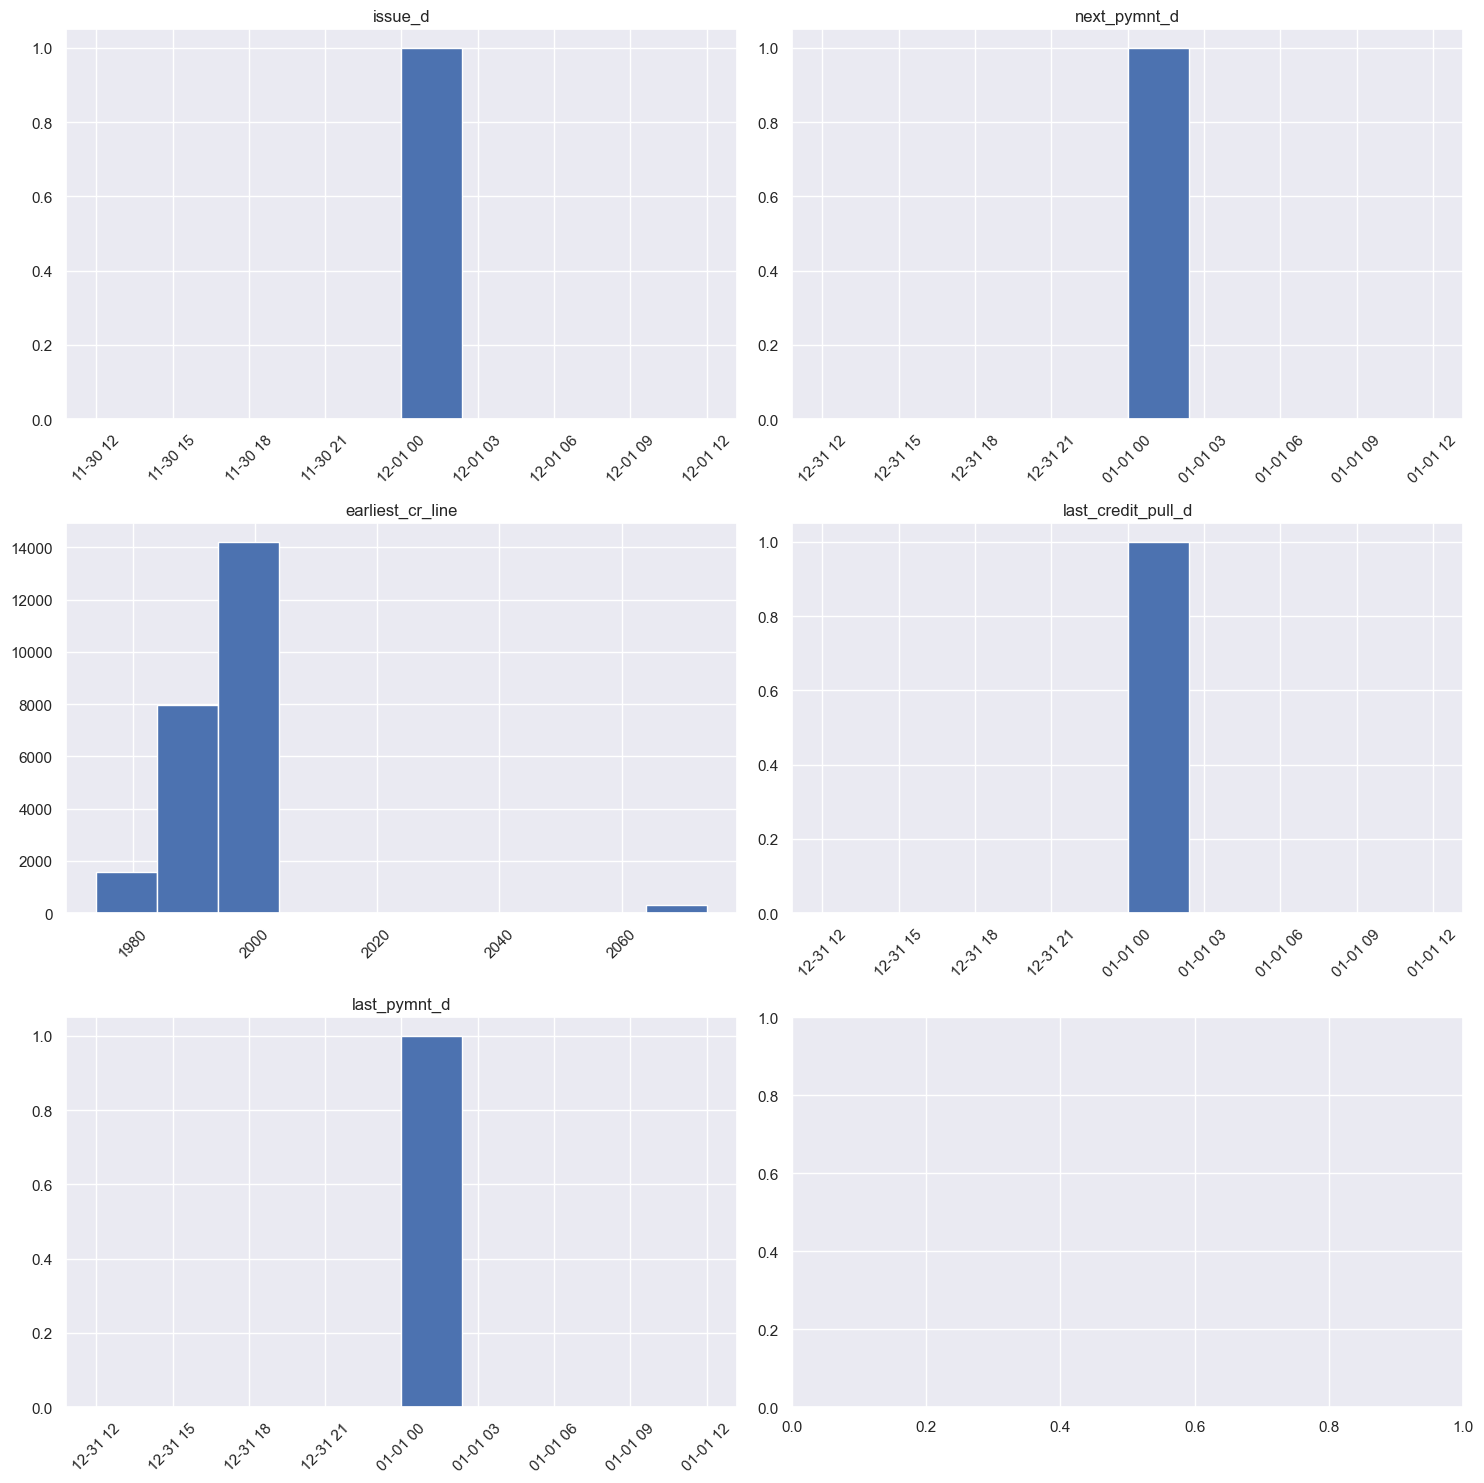

In [28]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

for idx, col in enumerate(df_dates.columns):
    df_dates[col] = pd.to_datetime(df_dates[col], errors='coerce')
    
    if idx < 3:
        ax[idx,0].hist(df_dates[col])
        ax[idx,0].set_title(f'{col}')
        ax[idx,0].tick_params(axis='x', rotation=45)
    else:
        ax[idx-3,1].hist(df_dates[col])
        ax[idx-3,1].set_title(f'{col}')
        ax[idx-3,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The histograms give us a display of the dates for the different observations. The only one with many observations is from the `earliest_cr_line` column. The rest show only one observation, meaning the to_datetime() function was not able to convert the dates to datetime format because they were in 'DD-MMM' format as we saw in the `issue_d` column above. With the `earliest_cr_line` column, we can see in what year the data reaches its end (somewhere around the year 2000). There is an incorrect date that shows its past 2060. Let's see what the max year is while disregarding the incorrect date. 

In [29]:
df_dates.query('earliest_cr_line < 2023').earliest_cr_line.max()

Timestamp('1999-12-01 00:00:00')

The most recent year displayed in the data, then, is in 1999. This means that the dates formatted as 'DD-MMM' are referring to the year 2000. We'll create a function to convert all dates into the correct format.

In [30]:
def date_parser(date_str):
    '''Converts dates of formats DD-MMM and MMM-YY to datetime objects.
    DD-MMM formats are converted to the current year.'''
    data_year = 2000
    try:
        # try to parse current year dates as 'DD-MMM'
        return dt.datetime.strptime(f"{date_str}-{data_year}", "%d-%b-%Y")
    except:
        try:
                # try to parse previous year dates as 'MMM-YY'
            return dt.datetime.strptime(f"{date_str}", "%b-%y")
        except:
            return pd.NaT  # return Not a Time for unparseable formats

for col in df_dates.columns:
    loan_default_corrected_types[col] = loan_default_corrected_types[col].apply(date_parser)

loan_default_corrected_types[df_dates.columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38480 entries, 2 to 38480
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             38480 non-null  datetime64[ns]
 1   earliest_cr_line    38480 non-null  datetime64[ns]
 2   last_pymnt_d        38409 non-null  datetime64[ns]
 3   next_pymnt_d        3383 non-null   datetime64[ns]
 4   last_credit_pull_d  38477 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 1.8 MB


The dates were successfully converted to datetime objects.

In [31]:
latest_date = '2000-12-31'

for col in df_dates.columns:
    num_future_dates = loan_default_corrected_types.query(f'{col} > "{latest_date}"')[col].count()
    print(f'{col}: {num_future_dates}')

issue_d: 0
earliest_cr_line: 88
last_pymnt_d: 0
next_pymnt_d: 0
last_credit_pull_d: 0


This check shows us how many dates are past the latest date possible in the data. There seems to be an issue with the `earliest_cr_line` column, and it is likely the dates that were identified to be around 2060.

In [32]:
loan_default_corrected_types.query('earliest_cr_line > "2000-12-31"')['earliest_cr_line'].head()

763    2063-03-01
1116   2066-03-01
1151   2068-09-01
1447   2064-09-01
1614   2067-11-01
Name: earliest_cr_line, dtype: datetime64[ns]

Our suspicions have been confirmed. Lets check to see what the dates were at these indices before they were converted to datetime to check if they may have been a different date before.

In [33]:
loan_default_data.iloc[[762,1115,1150,1446,1613]]['earliest_cr_line']

763     Mar-63
1116    Mar-66
1151    Sep-68
1447    Sep-64
1614    Nov-67
Name: earliest_cr_line, dtype: object

As suspected, the data inherently carried these errors. Lets change these dates to the latest date possible in the data: '2000-12-31'. 

In [34]:
loan_default_corrected_types.loc[
    loan_default_corrected_types['earliest_cr_line'] > latest_date, 'earliest_cr_line'] = latest_date

loan_default_corrected_types.loc[loan_default_corrected_types['earliest_cr_line'] == latest_date, 'earliest_cr_line'].head()

763    2000-12-31
1116   2000-12-31
1151   2000-12-31
1447   2000-12-31
1614   2000-12-31
Name: earliest_cr_line, dtype: datetime64[ns]

Lets iterate through all the date columns and confirm they do not have future dates.

In [35]:
for col in df_dates.columns:
    num_future_dates = loan_default_corrected_types.query(f'{col} > "{latest_date}"')[col].count()
    print(f'{col}: {num_future_dates}')

issue_d: 0
earliest_cr_line: 0
last_pymnt_d: 0
next_pymnt_d: 0
last_credit_pull_d: 0


All the datetime features are now correctly represented.

### 1.6.3 Numeric Features<a id='1.6.3_Numeric_Features'></a>

From earlier inspection of `revol_util` (revolving debt utilized), we saw that it should be a percentage, representing the percentage of the limit utilizied, but it is listed as object type. In the first row we see there are quotation marks around the null value for `revol_util`. We'll strip the strings from anything non-numeric and convert them to floats.

In [36]:
corrected_percentages = loan_default_corrected_types['revol_util'].astype(str).str.replace('[^0-9.]', '', regex=True)

loan_default_corrected_types['revol_util'] = pd.to_numeric(corrected_percentages, errors='coerce')

loan_default_corrected_types['revol_util'].head()

2     0.0
3    21.3
4    99.9
5    47.2
6     0.0
Name: revol_util, dtype: float64

The feature is now correctly represented as a float. The rest of the numeric features were correctly represented upon initial inspection.

## 1.7 Removing Data<a id='1.7_Removing_Data'></a>

### 1.7.1 Irrelevant Features<a id='1.7.1_Irrelevant_Features'></a>

Recall that the purpose of the model will be to predict if a borrower is likely to default on a loan. The inputs of the model will then have to be based on features with information gathered at the application process. There are features included in the data that pertain to information gathered after the loan was funded. This is data that we can therefore remove. 

In [37]:
#Creating the variable for the new DataFrame loan_default_clean that will store the relevant and cleaned data

columns = ['loan_amnt','term','int_rate','installment','emp_length','home_ownership','annual_inc','verification_status',
          'purpose','addr_state','dti','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal',
           'revol_util','total_acc','repay_fail']

loan_default_clean = loan_default_corrected_types.loc[:,columns]

loan_default_clean.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,repay_fail
2,0.0,36,0.00,0.00,< 1 year,RENT,0.0,Not Verified,major_purchase,ZZ,0.00,0.0,2000-01-01,0.0,0.0,0.0,0.0,0.0,1.0,1
3,2500.0,36,13.98,85.42,4 years,RENT,20004.0,Not Verified,other,MI,19.86,0.0,2000-08-05,5.0,7.0,0.0,981.0,21.3,10.0,0
4,5000.0,36,15.95,175.67,4 years,RENT,59000.0,Not Verified,debt_consolidation,NY,19.57,0.0,1994-04-01,1.0,7.0,0.0,18773.0,99.9,15.0,1
5,7000.0,36,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,other,TX,10.80,3.0,1998-03-01,3.0,7.0,0.0,3269.0,47.2,20.0,0
6,2000.0,36,5.42,60.32,10+ years,RENT,30000.0,Not Verified,debt_consolidation,NY,3.60,0.0,1975-01-01,0.0,7.0,0.0,0.0,0.0,15.0,0


The rest of the columns are information gathered after the loan is funded. We are also exlcuding `mths_since_last_delinq` since there were many dates that are ahead of today's date, this column will likely have values that misrepresent the data.

### 1.7.2 Removing Null Values<a id='1.7.2_Removing_Null_Values'></a>

There were two rows we found where there were null values. The rows had states 'ZZ' and 'AA'.

In [38]:
loan_default_clean[(loan_default_clean['addr_state'] == 'ZZ') | (loan_default_clean['addr_state'] == 'AA')]

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,repay_fail
2,0.0,36,0.00,0.0,< 1 year,RENT,0.0,Not Verified,major_purchase,ZZ,0.0,0.0,2000-01-01,0.0,0.0,0.0,0.0,0.0,1.0,1
1,NaN,60,100.99,NaN,10+ years,MORTGAGE,NaN,Verified,credit_card,AA,100.0,NaN,1999-12-01,NaN,NaN,NaN,NaN,100.0,NaN,0


We can safely remove these rows since they do not contain any valuable information.

In [39]:
condition = (loan_default_clean['addr_state'] == 'ZZ') | (loan_default_clean['addr_state'] == 'AA') 

loan_default_clean = loan_default_clean.drop(loan_default_clean[condition].index)

We can check the states to see if they've been dropped.

In [40]:
loan_default_clean['addr_state'].unique()

array(['MI', 'NY', 'TX', 'AL', 'AZ', 'MO', 'OH', 'CA', 'AR', 'NJ', 'WI',
       'VA', 'GA', 'FL', 'AK', 'MA', 'MN', 'MD', 'NV', 'KY', 'IL', 'NH',
       'CT', 'WA', 'NC', 'SD', 'UT', 'OR', 'DC', 'WY', 'KS', 'PA', 'SC',
       'RI', 'HI', 'LA', 'CO', 'WV', 'OK', 'VT', 'MT', 'NM', 'DE', 'TN',
       'MS', 'NE', 'IN', 'ID', 'IA', 'ME'], dtype=object)

In [41]:
loan_default_clean['addr_state'].nunique()

50

There are only the 50 states now and no sign of the null values.

### 1.7.3 Imputing Null Values<a id='1.7.3_Imputing_Null_Values'></a>

`emp_length` had a more significant amount of missing values, and we will be imputing those with the mode. 

In [42]:
condition = loan_default_clean['emp_length'].isna()

loan_default_clean.loc[condition,'emp_length'] = '10+ years'

loan_default_clean['emp_length'].info()

<class 'pandas.core.series.Series'>
Int64Index: 38478 entries, 3 to 38480
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
38478 non-null  object
dtypes: object(1)
memory usage: 601.2+ KB


In [43]:
loan_default_clean['emp_length'].value_counts()

10+ years    9457
< 1 year     4564
2 years      4292
3 years      3939
4 years      3314
1 year       3254
5 years      3171
6 years      2144
7 years      1702
8 years      1445
9 years      1196
Name: emp_length, dtype: int64

There are now no missing values in the `emp_length` feature.

In [44]:
loan_default_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38478 entries, 3 to 38480
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38478 non-null  float64       
 1   term                 38478 non-null  int32         
 2   int_rate             38478 non-null  float64       
 3   installment          38478 non-null  float64       
 4   emp_length           38478 non-null  object        
 5   home_ownership       38478 non-null  object        
 6   annual_inc           38477 non-null  float64       
 7   verification_status  38478 non-null  object        
 8   purpose              38478 non-null  object        
 9   addr_state           38478 non-null  object        
 10  dti                  38478 non-null  float64       
 11  delinq_2yrs          38478 non-null  float64       
 12  earliest_cr_line     38478 non-null  datetime64[ns]
 13  inq_last_6mths       38478 non-

There are still a couple of missing values sprinkled throughout the dataset. Fortunately it is very minimal and we are able to drop the missing values without getting rid of too much data.

In [45]:
loan_default_clean.dropna(inplace=True)

In [46]:
loan_default_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38415 entries, 3 to 38480
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38415 non-null  float64       
 1   term                 38415 non-null  int32         
 2   int_rate             38415 non-null  float64       
 3   installment          38415 non-null  float64       
 4   emp_length           38415 non-null  object        
 5   home_ownership       38415 non-null  object        
 6   annual_inc           38415 non-null  float64       
 7   verification_status  38415 non-null  object        
 8   purpose              38415 non-null  object        
 9   addr_state           38415 non-null  object        
 10  dti                  38415 non-null  float64       
 11  delinq_2yrs          38415 non-null  float64       
 12  earliest_cr_line     38415 non-null  datetime64[ns]
 13  inq_last_6mths       38415 non-

Now there is no missing data. Hurray!

## 1.8 Saving The Data<a id='1.8_Saving_The_Data'></a>

In [47]:
loan_default_clean.to_csv('../data/interim/loan_default_clean.csv')

The data has now been saved for the next step.